## Code based on S. Chatterjee, A New Coefficient of Correlation (2020), Journal of the American Statistical Association.

In [33]:
import numpy as np
from scipy.stats import rankdata, norm

In [33]:
def xicor2(x, y, ties="auto"):
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    n = len(y)

    if len(x) != n:
        raise IndexError(
            f"x, y length mismatch: {len(x)}, {len(y)}"
        )

    if ties == "auto":
        ties = len(np.unique(y)) < n
    elif not isinstance(ties, bool):
        raise ValueError(
            f"expected ties either \"auto\" or boolean, "
            f"got {ties} ({type(ties)}) instead"
        )
    
    y = y[np.argsort(x)]
    r = rankdata(y, method="ordinal")
    nominator = np.sum(np.abs(np.diff(r)))

    if ties:
        l = rankdata(y, method="max")
        denominator = 2 * np.sum(l * (n - l))
        nominator *= n
    else:
        denominator = np.power(n, 2) - 1
        nominator *= 3

    statistic = 1 - nominator / denominator  # upper bound is (n - 2) / (n + 1)
    p_value = norm.sf(statistic, scale=2 / 5 / np.sqrt(n))

    return statistic, p_value

In [45]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def calculate_correlation_coeffs(X, Y):
    # Calculate the Pearson correlation coefficient
    pearson_corr, _ = pearsonr(X, Y)
    
    # Calculate the Spearman's rank correlation coefficient
    spearman_corr, _ = spearmanr(X, Y)

    # Calculate Kendall's Tau correlation coefficient
    kendall_corr, _ = kendalltau(X, Y)
    
    return pearson_corr, spearman_corr, kendall_corr

# Usage

In [53]:
import numpy as np

def create_periodic_correlated_data(num_points):
    np.random.seed(42)  # For reproducibility
    X = np.linspace(0, 8, num_points)
    # Increasing the period by reducing the frequency factor in the sinusoidal function
    Y = np.sin(X * 0.5) + np.random.normal(0, 0.2, num_points)  # Smaller noise for clearer periodic pattern
    return X, Y

# Usage
X, Y = create_periodic_correlated_data(100)

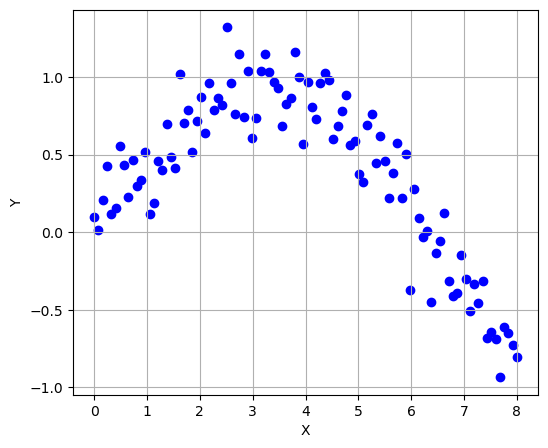

In [54]:
# Plot the generated data
plt.figure(figsize=(6, 5))
plt.scatter(X, Y, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [55]:
X, Y = create_periodic_correlated_data(100)  # Assuming this function is defined
pearson_coeff, spearman_coeff, kendall_coeff = calculate_correlation_coeffs(X, Y)
print("Pearson's r:", pearson_coeff)
print("Spearman's ρ (rho):", spearman_coeff)
print("Kendall's τ (tau):", kendall_coeff)

Pearson's r: -0.571392185281161
Spearman's ρ (rho): -0.4677587758775877
Kendall's τ (tau): -0.3268686868686869


In [56]:
xicor2(X, Y, ties="auto")

(0.6189618961896189, 2.596818686085231e-54)